In [1]:

!pip install dataset huggingface_hub tweet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: rich
    Found existing installation: rich 13.9.4
    Uninstalling rich-13.9.4:
      Successfully uninstalled rich-13.9.4
  Attempting uninstall: click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7
  Attempting uninstall: typer
    Found existing installation: typer 0.15.1
    Uninstalling typer-0.15.1:
      Successfully uninstalled

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


# concat 3 datasets

In [3]:

imdb_test=pd.read_csv("/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Test.csv")
imdb_train=pd.read_csv("/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Train.csv")
imdb_val=pd.read_csv("/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Valid.csv")
imdb=pd.concat([imdb_test,imdb_train,imdb_val])
print(len(imdb))
imdb.head()

50000


,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [4]:

stock=pd.read_csv("/kaggle/input/stock-news-sentiment-analysismassive-dataset/Sentiment_Stock_data.csv")
stock=stock.iloc[:,1:]
stock=stock.reindex(columns=["Sentence","Sentiment"])
stock = stock.rename(columns={
    "Sentence": 'text',
    "Sentiment": 'label'
})
print(len(stock))
stock.head()


108751


,text,label
0,"According to Gran , the company has no plans t...",0
1,"For the last quarter of 2010 , Componenta 's n...",1
2,"In the third quarter of 2010 , net sales incre...",1
3,Operating profit rose to EUR 13.1 mn from EUR ...,1
4,"Operating profit totalled EUR 21.1 mn , up fro...",1


In [5]:

senti_test=pd.read_csv("/kaggle/input/sentiment-analysis-dataset/test.csv",encoding="ISO-8859-1")
senti_train=pd.read_csv("/kaggle/input/sentiment-analysis-dataset/train.csv",encoding="ISO-8859-1")

senti=pd.concat([senti_test,senti_train])
senti=senti.iloc[:,1:3]
senti["label"]=[0 if x=="negative" else 1 for x in senti["sentiment"]]
senti=senti.drop(["sentiment"], axis=1)
senti.head()

,text,label
0,Last session of the day http://twitpic.com/67ezh,1
1,Shanghai is also really exciting (precisely -...,1
2,"Recession hit Veronique Branquinho, she has to...",0
3,happy bday!,1
4,http://twitpic.com/4w75p - I like it!!,1


In [6]:

df=pd.concat([imdb,stock,senti] ,ignore_index=True)
print(len(df))
df.head()

191047


,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


# Preprocessing dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191047 entries, 0 to 191046
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    189764 non-null  object
 1   label   191047 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ MB


<Axes: xlabel='label', ylabel='count'>

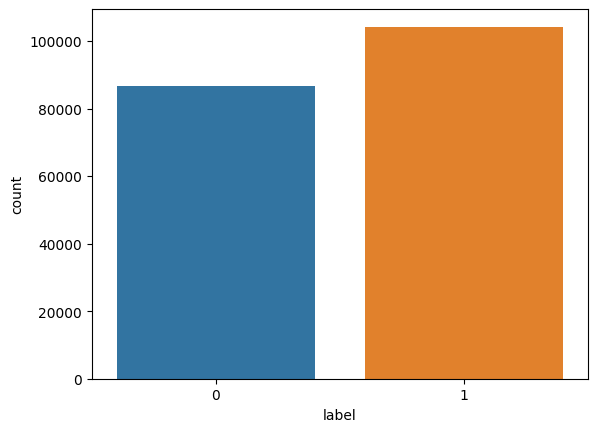

In [8]:
# Let's observe distribution of positive / negative sentiments in dataset

import seaborn as sns
sns.countplot(x='label', data=df)

In [9]:


df.dropna(axis=0,inplace=True)
df.describe(include="all")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,text,label
count,189764,189764.000000
unique,188896,NaN
top,Loved today's show!!! It was a variety and not...,NaN
freq,5,NaN
mean,NaN,0.542548
std,NaN,0.498188
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,1.000000


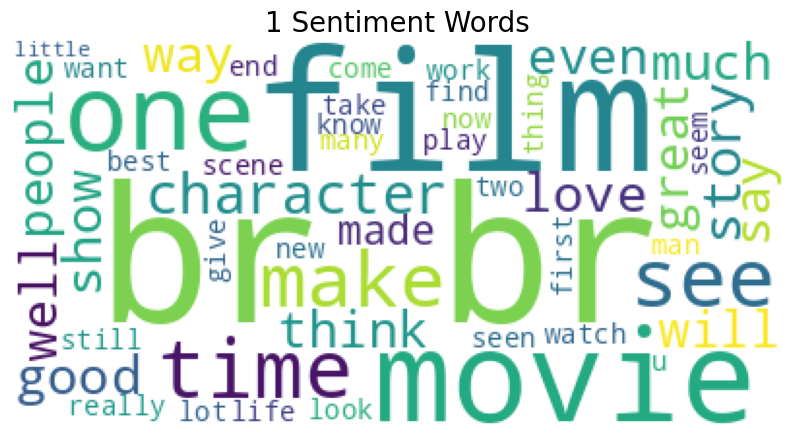

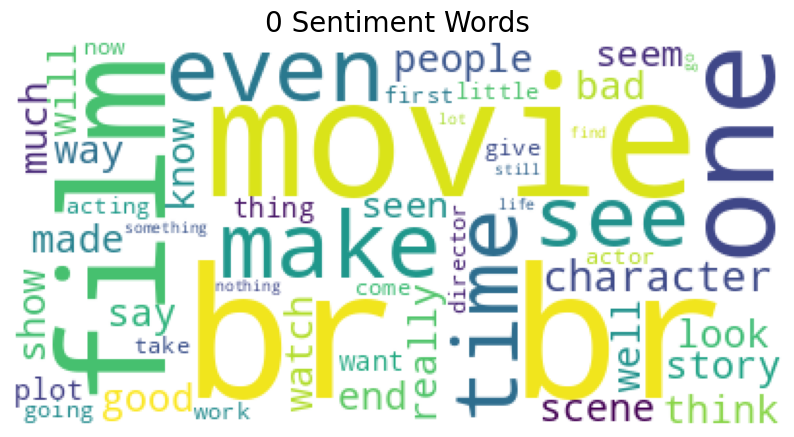

In [10]:
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(data, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in data[data.label==category]['text']])

    # Initialize wordcloud object
    wc = WordCloud(background_color='white',
                   max_words=50,
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()

# Positive tweet words
wordcount_gen(df, 1)

# Negative tweet words
wordcount_gen(df, 0)



In [11]:
# Save the DataFrame as a CSV file
df.to_csv("sentiment_analys_clean.csv", index=False)

print("CSV file created successfully!")

CSV file created successfully!


# Push to hub

In [12]:

from datasets import load_dataset

dataset=load_dataset("csv",data_files="/kaggle/working/sentiment_analys_clean.csv")

Generating train split: 0 examples [00:00, ? examples/s]

In [13]:
dataset["train"][0]

{'text': 'I always wrote this series off as being a complete stink-fest because Jim Belushi was involved in it, and heavily. But then one day a tragic happenstance occurred. After a White Sox game ended I realized that the remote was all the way on the other side of the room somehow. Now I could have just gotten up and walked across the room to get the remote, or even to the TV to turn the channel. But then why not just get up and walk across the country to watch TV in another state? "Nuts to that", I said. So I decided to just hang tight on the couch and take whatever Fate had in store for me. What Fate had in store was an episode of this show, an episode about which I remember very little except that I had once again made a very broad, general sweeping blanket judgment based on zero objective or experiential evidence with nothing whatsoever to back my opinions up with, and once again I was completely right! This show is a total crud-pie! Belushi has all the comedic delivery of a hair

In [14]:
from huggingface_hub import notebook_login

# Log in using your Hugging Face token (get it from https://huggingface.co/settings/tokens)
notebook_login()

In [17]:
# Split into train (80%) and temp (20%)
train_test_split = dataset["train"].train_test_split(test_size=0.3, seed=42)

# Split temp into validation (10%) and test (10%)
val_test_split = train_test_split["test"].train_test_split(test_size=0.5, seed=42)

# Final dataset
dataset = {
    "train": train_test_split["train"],
    "validation": val_test_split["train"],
    "test": val_test_split["test"]
}

In [18]:
dataset

{'train': Dataset({
     features: ['text', 'label'],
     num_rows: 106267
 }),
 'validation': Dataset({
     features: ['text', 'label'],
     num_rows: 22772
 }),
 'test': Dataset({
     features: ['text', 'label'],
     num_rows: 22772
 })}

In [20]:
from datasets import DatasetDict

# Convert dictionary back to DatasetDict
dataset_dict = DatasetDict(dataset)

In [21]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 106267
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 22772
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 22772
    })
})

In [22]:
# Push to Hugging Face Hub
dataset_dict.push_to_hub("KaushiGihan/sentiment_analys_3_combine_ds")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/107 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/23 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/23 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/KaushiGihan/sentiment_analys_3_combine_ds/commit/45da57097e923ab4ab05afe399368b0c2c3e30e3', commit_message='Upload dataset', commit_description='', oid='45da57097e923ab4ab05afe399368b0c2c3e30e3', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/KaushiGihan/sentiment_analys_3_combine_ds', endpoint='https://huggingface.co', repo_type='dataset', repo_id='KaushiGihan/sentiment_analys_3_combine_ds'), pr_revision=None, pr_num=None)